In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics
import sklearn.tree
import sklearn.ensemble
import sklearn.gaussian_process
import sklearn.neural_network

import warnings
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_csv('sgemm_product.csv')
print(data)

        MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  \
0        16   16   16      8      8      8      8    2    1    1     0     0   
1        16   16   16      8      8      8      8    2    1    1     0     0   
2        16   16   16      8      8      8      8    2    1    1     0     0   
3        16   16   16      8      8      8      8    2    1    1     0     0   
4        16   16   16      8      8      8      8    2    1    1     0     1   
5        16   16   16      8      8      8      8    2    1    1     0     1   
6        16   16   16      8      8      8      8    2    1    1     0     1   
7        16   16   16      8      8      8      8    2    1    1     0     1   
8        16   16   16      8      8      8      8    2    1    1     1     0   
9        16   16   16      8      8      8      8    2    1    1     1     0   
10       16   16   16      8      8      8      8    2    1    1     1     0   
11       16   16   16      8      8     

In [31]:
data.describe()

MWG            NWG            KWG          MDIMC  \
count  241600.000000  241600.000000  241600.000000  241600.000000   
mean       80.415364      80.415364      25.513113      13.935894   
std        42.469220      42.469220       7.855619       7.873662   
min        16.000000      16.000000      16.000000       8.000000   
25%        32.000000      32.000000      16.000000       8.000000   
50%        64.000000      64.000000      32.000000       8.000000   
75%       128.000000     128.000000      32.000000      16.000000   
max       128.000000     128.000000      32.000000      32.000000   

               NDIMC          MDIMA          NDIMB            KWI  \
count  241600.000000  241600.000000  241600.000000  241600.000000   
mean       13.935894      17.371126      17.371126       5.000000   
std         7.873662       9.389418       9.389418       3.000006   
min         8.000000       8.000000       8.000000       2.000000   
25%         8.000000       8.000000       8.000000       2.000000   
50%         8.000000      16.000000      16.000000       5.000000   
75%        16.000000      32.000000      32.000000       8.000000   
max        32.000000      32.000000      32.000000       8.000000   

                 VWM            VWN           STRM           STRN  \
count  241600.000000  241600.000000  241600.000000  241600.000000   
mean        2.448609       2.448609       0.500000       0.500000   
std         1.953759       1.953759       0.500001       0.500001   
min         1.000000       1.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         2.000000       2.000000       0.500000       0.500000   
75%         4.000000       4.000000       1.000000       1.000000   
max         8.000000       8.000000       1.000000       1.000000   

                  SA             SB      Run1 (ms)      Run2 (ms)  \
count  241600.000000  241600.000000  241600.000000  241600.000000   
mean        0.500000       0.500000     217.647852     217.579536   
std         0.500001       0.500001     369.012422     368.677309   
min         0.000000       0.000000      13.290000      13.250000   
25%         0.000000       0.000000      40.660000      40.710000   
50%         0.500000       0.500000      69.825000      69.930000   
75%         1.000000       1.000000     228.530000     228.310000   
max         1.000000       1.000000    3339.630000    3375.420000   

           Run3 (ms)      Run4 (ms)  
count  241600.000000  241600.000000  
mean      217.532756     217.527669  
std       368.655118     368.677413  
min        13.360000      13.370000  
25%        40.660000      40.640000  
50%        69.790000      69.820000  
75%       228.320000     228.320000  
max      3397.080000    3361.710000

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [33]:
correlations = data.corr()[data.columns[-1]]
print("Correlations with target")
print(correlations)

Correlations with target
MWG          0.351918
NWG          0.320458
KWG          0.011106
MDIMC       -0.221023
NDIMC       -0.214504
MDIMA       -0.007013
NDIMB       -0.008699
KWI          0.032701
VWM          0.164293
VWN          0.144745
STRM        -0.012585
STRN        -0.000100
SA           0.051800
SB           0.063883
Run1 (ms)    0.999940
Run2 (ms)    0.999982
Run3 (ms)    0.999981
Run4 (ms)    1.000000
Name: Run4 (ms), dtype: float64


In [34]:
correlations = data.corr()[data.columns[-2]]
print("Correlations with target")
print(correlations)

Correlations with target
MWG          0.351920
NWG          0.320550
KWG          0.011155
MDIMC       -0.221050
NDIMC       -0.214465
MDIMA       -0.006998
NDIMB       -0.008657
KWI          0.032713
VWM          0.164313
VWN          0.144745
STRM        -0.012587
STRN        -0.000109
SA           0.051778
SB           0.063904
Run1 (ms)    0.999939
Run2 (ms)    0.999982
Run3 (ms)    1.000000
Run4 (ms)    0.999981
Name: Run3 (ms), dtype: float64


In [35]:
correlations = data.corr()[data.columns[-3]]
print("Correlations with target")
print(correlations)

Correlations with target
MWG          0.351876
NWG          0.320405
KWG          0.011148
MDIMC       -0.221004
NDIMC       -0.214556
MDIMA       -0.007047
NDIMB       -0.008718
KWI          0.032685
VWM          0.164279
VWN          0.144704
STRM        -0.012603
STRN        -0.000100
SA           0.051827
SB           0.063897
Run1 (ms)    0.999941
Run2 (ms)    1.000000
Run3 (ms)    0.999982
Run4 (ms)    0.999982
Name: Run2 (ms), dtype: float64


In [36]:
correlations = data.corr()[data.columns[-4]]
print("Correlations with target")
print(correlations)

Correlations with target
MWG          0.351506
NWG          0.320408
KWG          0.011508
MDIMC       -0.221296
NDIMC       -0.214842
MDIMA       -0.007082
NDIMB       -0.008753
KWI          0.032183
VWM          0.164199
VWN          0.144779
STRM        -0.012568
STRN        -0.000122
SA           0.052492
SB           0.064162
Run1 (ms)    1.000000
Run2 (ms)    0.999941
Run3 (ms)    0.999939
Run4 (ms)    0.999940
Name: Run1 (ms), dtype: float64


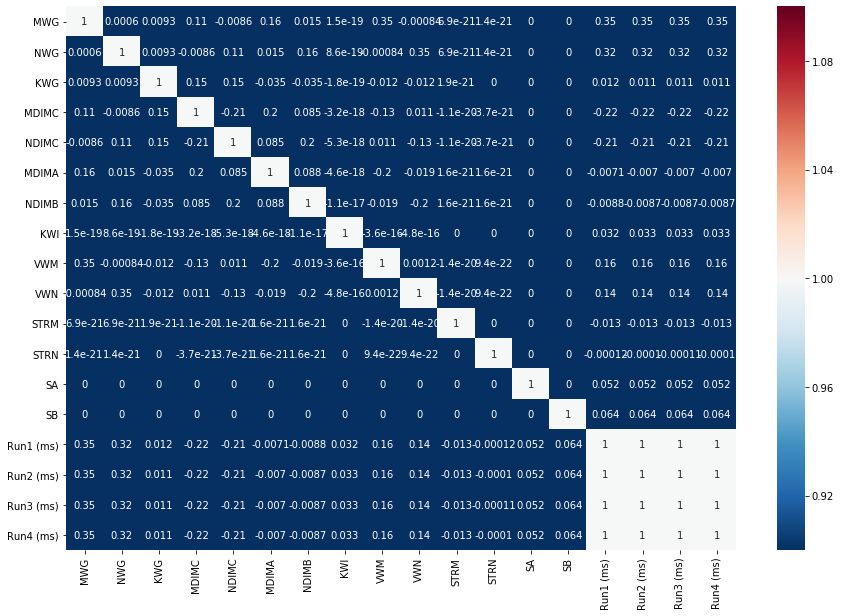

In [37]:
#Correclation
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=0, vmin=1, cmap="RdBu_r")

In [38]:
data = data.to_numpy()
X = data[:, :data.shape[1]-1]
y4 = data[:, data.shape[1]-1:]
y3 = data[:, data.shape[1]-2:data.shape[1]-1]
y2 = data[:, data.shape[1]-3:data.shape[1]-2]
y1 = data[:, data.shape[1]-4:data.shape[1]-3]

In [39]:
def errors_data(y_train, y_predict):
    mean_square_error = sklearn.metrics.mean_squared_error(y_train, y_predict)
    print("Root Mean Squared", mean_square_error)
    mean_absolut = sklearn.metrics.mean_absolute_error(y_train.ravel(), y_predict.ravel())
    print("Mean Absoulte Error", mean_absolut)
    return mean_square_error, mean_absolut

#Models for y1

In [40]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y1, test_size=0.2)

In [41]:
#Scaling
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)

scaler = sklearn.preprocessing.StandardScaler()
X_test = scaler.fit(X_test).transform(X_test)

In [ ]:
#Support vector Regression
param_grid = {
    'kernel':["rbf", "linear", "sigmoid"],
    'gamma':['auto', 'scale']
}
SVR = sklearn.svm.SVR()
grid_search_cv = sklearn.model_selection.GridSearchCV(SVR, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
#Decision Tree Regression
param_grid = {
    'splitter':['best', 'random'],
    "max_depth": np.arange(1, 50, 1),
    "min_samples_split":np.arange(2,8,1),
}

decision_tree_regression = sklearn.tree.DecisionTreeRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(decision_tree_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Random Forest Regression
param_grid = {
    'n_estimators':np.arange(1, 100, 1),
#     'max_depth':np.arange(1,100,1),
#     'min_samples_leaf':np.arange(1,5,1)
}

random_forest_regression = sklearn.ensemble.RandomForestRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(random_forest_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Ada boost regression
param_grid = {
    'n_estimators': np.arange(1,50,1),
#     'learning_rate': np.arange(1,4,0.1),
    'loss':['linear', 'square', 'exponential']
}
ada_boost_regression = sklearn.ensemble.AdaBoostRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(ada_boost_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#linear regression
param_grid={
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'n_jobs':np.arange(1, 100, 1)
}
linear_regression = sklearn.linear_model.LinearRegression()
grid_search_cv = sklearn.model_selection.GridSearchCV(linear_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Gaussian Process Regression
param_grid={
    'kernel': [sklearn.gaussian_process.kernels.DotProduct(), sklearn.gaussian_process.kernels.WhiteKernel(), sklearn.gaussian_process.kernels.RBF()],
    'n_restarts_optimizer':np.arange(0,100,1),
    'normalize_y':[True, False]
}
gaussian_process_regression = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(gaussian_process_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#neural network regression
hidden_layer_size = [(x, ) for x in np.arange(0, 10,1)]
param_grid={
    'hidden_layer_sizes': hidden_layer_size,
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam']
}
neural_network_regression = sklearn.neural_network.MLPRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(neural_network_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

#Models for y2

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y2, test_size=0.2)

In [ ]:
#Scaling
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)

In [ ]:
#Support vector Regression
param_grid = {
    'kernel':["rbf", "linear", "sigmoid"],
    'gamma':['auto', 'scale']
}
SVR = sklearn.svm.SVR()
grid_search_cv = sklearn.model_selection.GridSearchCV(SVR, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Decision Tree Regression
param_grid = {
    'splitter':['best', 'random'],
    "max_depth": np.arange(1, 100, 1),
#     "min_samples_split":np.arange(2,8,1),
#     'min_samples_leaf':np.arange(1, 100, 1)//leave to default
}

decision_tree_regression = sklearn.tree.DecisionTreeRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(decision_tree_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Random Forest Regression
param_grid = {
    'n_estimators':np.arange(1, 100, 1),
#     'max_depth':np.arange(1,100,1),
#     'min_samples_leaf':np.arange(1,5,1)
}

random_forest_regression = sklearn.ensemble.RandomForestRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(random_forest_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Ada boost regression
param_grid = {
    'n_estimators': np.arange(1,100,1),
#     'learning_rate': np.arange(1,4,0.1),
    'loss':['linear', 'square', 'exponential']
}
ada_boost_regression = sklearn.ensemble.AdaBoostRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(ada_boost_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#linear regression
param_grid={
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'n_jobs':np.arange(1, 100, 1)
}
linear_regression = sklearn.linear_model.LinearRegression()
grid_search_cv = sklearn.model_selection.GridSearchCV(linear_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Gaussian Process Regression
param_grid={
    'kernel': [sklearn.gaussian_process.kernels.DotProduct(), sklearn.gaussian_process.kernels.WhiteKernel(), sklearn.gaussian_process.kernels.RBF()],
    'n_restarts_optimizer':np.arange(0,10,1),
    'normalize_y':[True, False]
}
gaussian_process_regression = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(gaussian_process_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#neural network regression
hidden_layer_size = [(x, ) for x in np.arange(0, 100,1)]
param_grid={
    'hidden_layer_sizes': hidden_layer_size,
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam']
}
neural_network_regression = sklearn.neural_network.MLPRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(neural_network_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

#Models for y3

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y3, test_size=0.2)

In [ ]:
#Scaling
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)

In [ ]:
#Support vector Regression
param_grid = {
    'kernel':["rbf", "linear", "sigmoid"],
    'gamma':['auto', 'scale']
}
SVR = sklearn.svm.SVR()
grid_search_cv = sklearn.model_selection.GridSearchCV(SVR, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Decision Tree Regression
param_grid = {
    'splitter':['best', 'random'],
    "max_depth": np.arange(1, 100, 1),
#     "min_samples_split":np.arange(2,8,1),
#     'min_samples_leaf':np.arange(1, 100, 1)//leave to default
}

decision_tree_regression = sklearn.tree.DecisionTreeRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(decision_tree_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Random Forest Regression
param_grid = {
    'n_estimators':np.arange(1, 100, 1),
#     'max_depth':np.arange(1,100,1),
#     'min_samples_leaf':np.arange(1,5,1)
}

random_forest_regression = sklearn.ensemble.RandomForestRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(random_forest_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Ada boost regression
param_grid = {
    'n_estimators': np.arange(1,100,1),
#     'learning_rate': np.arange(1,4,0.1),
    'loss':['linear', 'square', 'exponential']
}
ada_boost_regression = sklearn.ensemble.AdaBoostRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(ada_boost_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#linear regression
param_grid={
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'n_jobs':np.arange(1, 10, 1)
}
linear_regression = sklearn.linear_model.LinearRegression()
grid_search_cv = sklearn.model_selection.GridSearchCV(linear_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Gaussian Process Regression
param_grid={
    'kernel': [sklearn.gaussian_process.kernels.DotProduct(), sklearn.gaussian_process.kernels.WhiteKernel(), sklearn.gaussian_process.kernels.RBF()],
    'n_restarts_optimizer':np.arange(0,10,1),
    'normalize_y':[True, False]
}
gaussian_process_regression = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(gaussian_process_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#neural network regression
hidden_layer_size = [(x, ) for x in np.arange(0, 100,1)]
param_grid={
    'hidden_layer_sizes': hidden_layer_size,
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam']
}
neural_network_regression = sklearn.neural_network.MLPRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(neural_network_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

#Models for y4

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y4, test_size=0.2)

In [ ]:
#Scaling
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)

In [ ]:
#Support vector Regression
param_grid = {
    'kernel':["rbf", "linear", "sigmoid"],
    'gamma':['auto', 'scale']
}
SVR = sklearn.svm.SVR()
grid_search_cv = sklearn.model_selection.GridSearchCV(SVR, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Decision Tree Regression
param_grid = {
    'splitter':['best', 'random'],
    "max_depth": np.arange(1, 100, 1),
#     "min_samples_split":np.arange(2,8,1),
#     'min_samples_leaf':np.arange(1, 100, 1)//leave to default
}

decision_tree_regression = sklearn.tree.DecisionTreeRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(decision_tree_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Random Forest Regression
param_grid = {
    'n_estimators':np.arange(1, 100, 1),
#     'max_depth':np.arange(1,100,1),
#     'min_samples_leaf':np.arange(1,5,1)
}

random_forest_regression = sklearn.ensemble.RandomForestRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(random_forest_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Ada boost regression
param_grid = {
    'n_estimators': np.arange(1,100,1),
#     'learning_rate': np.arange(1,4,0.1),
    'loss':['linear', 'square', 'exponential']
}
ada_boost_regression = sklearn.ensemble.AdaBoostRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(ada_boost_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#linear regression
param_grid={
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'n_jobs':np.arange(1, 10, 1)
}
linear_regression = sklearn.linear_model.LinearRegression()
grid_search_cv = sklearn.model_selection.GridSearchCV(linear_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#Gaussian Process Regression
param_grid={
    'kernel': [sklearn.gaussian_process.kernels.DotProduct(), sklearn.gaussian_process.kernels.WhiteKernel(), sklearn.gaussian_process.kernels.RBF()],
    'n_restarts_optimizer':np.arange(0,100,1),
    'normalize_y':[True, False]
}
gaussian_process_regression = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(gaussian_process_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

In [ ]:
#neural network regression
hidden_layer_size = [(x, ) for x in np.arange(0, 100,1)]
param_grid={
    'hidden_layer_sizes': hidden_layer_size,
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam']
}
neural_network_regression = sklearn.neural_network.MLPRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(neural_network_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)